# Setup

In [1]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook

from matplotlib.animation import FuncAnimation

import tensorflow as tf

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
X, y = make_regression(n_samples=500, n_features=1, n_targets=1, noise=10, random_state=42)
print(X.shape, y.shape)

(500, 1) (500,)


In [4]:
# THIS IS VERY IMPORTANT TO CONVERT y into the shape of (n_samples, 1) 
#  or (n_samples, n_targets) if there are multiple targets
# y of shape (n_samples,) WILL NOT WORK PROPERLY for matrix multiplications!!
y = y.reshape(-1, 1)
y.shape

(500, 1)

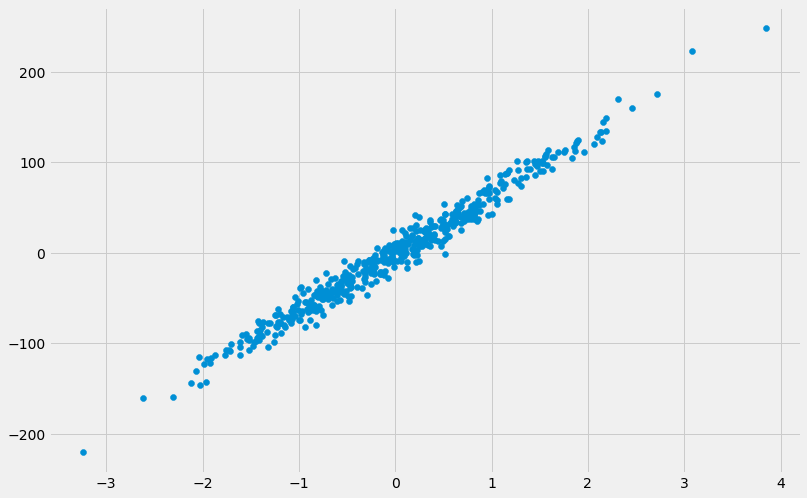

In [5]:
if X.shape == y.shape:
    # can only plot for one feature
    plt.scatter(X, y);

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train.shape, y_test.shape

((400, 1), (100, 1))

In [7]:
X_train.shape, X_test.shape

((400, 1), (100, 1))

# Own implementation

https://www.investopedia.com/terms/m/mlr.asp

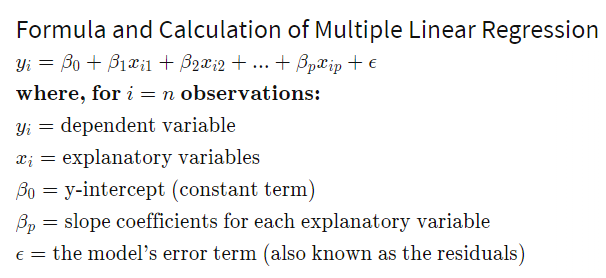

https://math.stackexchange.com/questions/3152235/partial-derivative-of-mse-cost-function-in-linear-regression?newreg=d8f2602266cc42de80d9c1a37974a781

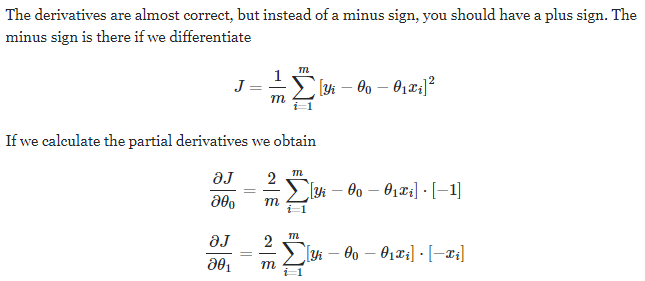

<pre>
NOTE: Capital letters are used to denote variables in matrix form.
@ is the operator for matrix multiplication, also known as dot product.

- Need to use X @ W instead of W @ X due to the nature of matrix multiplication.
Best fit equation: Y_hat = X @ W + b
Cost function is Mean Squared Error (MSE): 
J = (1 / m) * np.sum(y - Y_hat) ** 2
  = (1 / m) * np.sum(y - b - X @ W) ** 2

- Dot product already includes the operation of summing up along the corresponding axis,
therefore np.sum is not required.
Derivative for W = (2 / m) * (dot product of (y - Y_hat) and -X)
                 = (2 / m) * (X.T @ (Y_hat - y))
                 
Derivative for b = (2 / m) * np.sum((y - Y_hat) * (-1))
                 = (2 / m) * np.sum(Y_hat - y)
</pre>

In [8]:
# Randomly initialized parameters
def init_params(X):
    n_features = X.shape[1]  # number of features
    W = np.random.randn(n_features, 1)  # the matrix for slope coefficients
    b = np.random.randn(1, 1)  # the y-intercept
    return W, b

In [9]:
W, b = init_params(X)
W.shape, b.shape

((1, 1), (1, 1))

In [10]:
Y_hat = X@W + b
Y_hat.shape

(500, 1)

In [11]:
# derivatives
def fit(X, y, learning_rate=0.01, iterations=500):
    W, b = init_params(X)
    m = X.shape[0]  # number of samples
    
    for i in range(iterations):
        # make predictions
        Y_hat = X@W + b
        
        # calculate gradients via derivatives (derived above)
        dW = (2 / m) * (X.T @ (Y_hat - y))
        db = (2 / m) * np.sum(Y_hat - y)
        
        # use gradient descent to update parameters
        # parameter = parameter - learning_rate * derivative_of_parameter
        W -= (learning_rate * dW)
        b -= (learning_rate * db)
    
    return W, b

In [12]:
W, b = fit(X_train, y_train, learning_rate=0.05, iterations=500)
W.shape, b.shape

((1, 1), (1, 1))

In [13]:
y_pred = X_train @ W + b
y_pred.shape

(400, 1)

In [14]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
sk_y_pred = linear_reg.predict(X_train)
sk_y_pred.shape

(400, 1)

In [15]:
from sklearn.metrics import r2_score, mean_squared_error
print(f"My implementation\t: R2 = {r2_score(y_train, y_pred)}")
print(f"sklearn implementation\t: R2 = {r2_score(y_train, sk_y_pred)}")

My implementation	: R2 = 0.9760485214288342
sklearn implementation	: R2 = 0.9760485214288342


# Object-oriented method

In [35]:
def mse(y_true, y_pred):
    # using mean squared error for computing loss
    return ((y_pred - y_true) ** 2).mean()

class MyLinearReg:
    def __init__(self):
        # Initialize the dictionary for parameters here
        self.parameters = {}
        
    def _init_params(self, X):
        # number of features
        n_features = X.shape[1]
        # the matrix for slope coefficients
        self.parameters['coef'] = np.random.randn(n_features, 1)
        # the y-intercept
        self.parameters['intercept'] = np.random.randn(1, 1)
        
    def update_params(self, X, y, learning_rate):
        m = X.shape[0]  # number of samples
        Y_hat = self.predict(X)

        # calculate gradients via derivatives
        dA = (2 / m) * (X.T @ (Y_hat - y))
        db = (2 / m) * np.sum(Y_hat - y)

        # use gradient descent to update parameters
        # parameter = parameter - learning_rate * derivative_of_parameter
        self.parameters['coef'] -= (learning_rate * dA)
        self.parameters['intercept'] -= (learning_rate * db)
        
    def fit(self, X, y, learning_rate=0.01, iterations=500, verbose=1):
        # initialize the parameters
        self._init_params(X)

        for i in range(1, iterations + 1):
            # update parameters using gradient descent
            self.update_params(X, y, learning_rate)
            if verbose and (i == 1 or i % 100 == 0):
                print(f"Iteration {i}/{iterations}", end="")
                print(f"\tCoefficient: {self.parameters['coef'].flatten()}", end="")
                print(f"\tIntercept: {self.parameters['intercept']}")
    
    def predict(self, X):
        if 'coef' not in self.parameters.keys():
            # initialize the parameters if still not yet
            self._init_params(X)
        return X @ self.parameters['coef'] + self.parameters['intercept']
    
    def score(self, X, y):
        from sklearn.metrics import r2_score
        y_pred = self.predict(X)
        return r2_score(y, y_pred)

In [17]:
X_train.shape, y_train.shape

((400, 1), (400, 1))

In [52]:
my_linear_reg = MyLinearReg()
print("R2 before training =", my_linear_reg.score(X_train, y_train.reshape(-1, 1)))
start_time = time.time()
my_linear_reg.fit(X_train, y_train.reshape(-1, 1), learning_rate=0.05, iterations=1000)
print(f"Coefficient shape: {my_linear_reg.parameters['coef'].shape}", end="")
print(f"\ty-intercept shape: {my_linear_reg.parameters['intercept'].shape}")
print(f"Time elapsed: {(time.time() - start_time):.4f} seconds")
print("R2 after training  =", my_linear_reg.score(X_train, y_train))

R2 before training = -0.04383426357567166
Iteration 1/1000	Coefficient: [6.10323016]	Intercept: [[-0.7404308]]
Iteration 100/1000	Coefficient: [63.750033]	Intercept: [[-0.51521838]]
Iteration 200/1000	Coefficient: [63.75163361]	Intercept: [[-0.51530563]]
Iteration 300/1000	Coefficient: [63.75163365]	Intercept: [[-0.51530564]]
Iteration 400/1000	Coefficient: [63.75163365]	Intercept: [[-0.51530564]]
Iteration 500/1000	Coefficient: [63.75163365]	Intercept: [[-0.51530564]]
Iteration 600/1000	Coefficient: [63.75163365]	Intercept: [[-0.51530564]]
Iteration 700/1000	Coefficient: [63.75163365]	Intercept: [[-0.51530564]]
Iteration 800/1000	Coefficient: [63.75163365]	Intercept: [[-0.51530564]]
Iteration 900/1000	Coefficient: [63.75163365]	Intercept: [[-0.51530564]]
Iteration 1000/1000	Coefficient: [63.75163365]	Intercept: [[-0.51530564]]
Coefficient shape: (1, 1)	y-intercept shape: (1, 1)
Time elapsed: 0.0310 seconds
R2 after training  = 0.9760485214288342


In [19]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
print(linear_reg.coef_, linear_reg.intercept_)
linear_reg.score(X_train, y_train)

[[63.75163365]] [-0.51530564]


0.9760485214288342

## Multiple features

In [53]:
X2, y2 = make_regression(n_samples=500, n_features=3, n_targets=1, noise=10, random_state=42)
y2 = y2.reshape(-1, 1)
print(X2.shape, y2.shape)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)
print(y_train2.shape, y_test2.shape)

my_linear_reg2 = MyLinearReg()
print("R2 before training =", my_linear_reg2.score(X_train2, y_train2))
start_time = time.time()
my_linear_reg2.fit(X_train2, y_train2, learning_rate=0.05, iterations=1000, verbose=0)
print(f"Coefficient shape: {my_linear_reg2.parameters['coef'].shape}", end="")
print(f"\ty-intercept shape: {my_linear_reg2.parameters['intercept'].shape}")
print(f"Time elapsed: {(time.time() - start_time):.4f} seconds")
print("R2 after training  =", my_linear_reg2.score(X_train2, y_train2))

linear_reg2 = LinearRegression()
linear_reg2.fit(X_train2, y_train2)
print("\nsklearn implementation:")
print(f"Coefficient: {linear_reg2.coef_}, Intercept: {linear_reg2.intercept_}")
print("R2 score =", linear_reg2.score(X_train2, y_train2))

(500, 3) (500, 1)
(400, 1) (100, 1)
R2 before training = 0.023868128538950706
Coefficient shape: (3, 1)	y-intercept shape: (1, 1)
Time elapsed: 0.0435 seconds
R2 after training  = 0.9907127213401182

sklearn implementation:
Coefficient: [[26.70129227 83.20981103 50.02850437]], Intercept: [-0.09061641]
R2 score = 0.9907127213401182


# Tensorflow GradientTape

In [49]:
def mse_loss(y_true, y_pred):
    # using mean squared error for computing loss
    return tf.reduce_mean(tf.square(y_true - y_pred))

class MyLinearRegTF:
    def __init__(self):
        # Initialize the parameters
        self.coef_ = None
        self.intercept_ = None
        
    def _init_params(self, X):
        print("[INFO] Initiliazed parameters")
        # number of features
        n_features = X.shape[1]
        # the matrix for slope coefficients
        # must use tf.Variable to allow gradients to be calculated
        self.coef_ = tf.Variable(tf.random.normal([n_features, 1]))
        # the y-intercept
        self.intercept_ = tf.Variable(tf.random.normal([1, 1]))
        
    def fit(self, X, y, learning_rate=0.01, iterations=500, verbose=1):
        # initialize the parameters
        self._init_params(X)
        
        print("[INFO] Training ...")
        for i in range(1, iterations + 1):
            # put them into the tape context manager to trace their computations
            #  in order to compute their derivatives
            with tf.GradientTape() as tape:
                # ensure these tensors are being traced by the tape.
                # not necessary here as the tape automatically traces all
                #  tf.Variable objects
                # tape.watch([self.coef_, self.intercept_])
            
                # make a prediction and then calculate the loss
                Y_hat = self.predict(X)
                # using mean squared error for computing loss
                loss = mse_loss(y, Y_hat)
            # calculate the gradients using our tape and then update the
            # model parameters
            dA, db = tape.gradient(loss, [self.coef_, self.intercept_])

            # update the parameters by subtracting inplace
            self.coef_.assign_sub(learning_rate * dA)
            self.intercept_.assign_sub(learning_rate * db)
            if verbose and (i == 1 or i % 100 == 0):
                print(f"Iteration {i}/{iterations}", end="")
                print(f"\tMSE Loss: {loss.numpy():.4f}", end="")
                print(f"\tCoefficient: {self.coef_.numpy().flatten()}", end="")
                print(f"\tIntercept: {self.intercept_.numpy().flatten()}")
                
    def fit2(self, X, y, learning_rate=0.01, iterations=500, verbose=1):
        # initialize the parameters
        self._init_params(X)
        # define the optimizer (SGD = Stochastic Gradient Descent)
        opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)
        # define the function used for cost function
        mse_loss = lambda: tf.reduce_mean(tf.square(y - self.predict(X)))
        
        print("[INFO] Training ...")
        for i in range(1, iterations + 1):
            # update parameters using gradient descent
            opt.minimize(mse_loss, var_list=[self.coef_, self.intercept_])
            
            if verbose and (i == 1 or i % 100 == 0):
                print(f"Iteration {i}/{iterations}", end="")
                print(f"\tMSE Loss: {mse_loss().numpy():.4f}", end="")
                print(f"\tCoefficient: {self.coef_.numpy().flatten()}", end="")
                print(f"\tIntercept: {self.intercept_.numpy().flatten()}")
    
    def predict(self, X):
        if self.coef_ is None:
            # initialize the parameters if still not yet
            self._init_params(X)
        return X @ self.coef_ + self.intercept_
    
    def score(self, X, y):
        from sklearn.metrics import r2_score
        print("[INFO] Calculating score ... ")
        y_pred = self.predict(X)
        return r2_score(y, y_pred)

In [23]:
X_train.shape

(400, 1)

In [48]:
linear_reg_tf = MyLinearRegTF()
print("R2 before training =", linear_reg_tf.score(X_train2, y_train2), '\n')
start_time = time.time()
linear_reg_tf.fit(X_train2, y_train2, learning_rate=0.01, iterations=500)
print(f"Time elapsed: {(time.time() - start_time):.4f} seconds")
print("R2 after training =", linear_reg_tf.score(X_train2, y_train2))
print("R2 on test set =", linear_reg_tf.score(X_test2, y_test2))

[INFO] Calculating score ... 
[INFO] Initiliazed parameters
R2 before training = -0.026207453749097054 

[INFO] Initiliazed parameters
[INFO] Training ...
Iteration 1/500	MSE Loss: 10181.4277	Coefficient: [0.9742578 2.5247383 0.9076073]	Intercept: [1.7257804]
Iteration 100/500	MSE Loss: 280.7041	Coefficient: [21.342533 71.955666 44.928772]	Intercept: [1.6220696]
Iteration 200/500	MSE Loss: 99.7447	Coefficient: [25.57082 81.66219 49.50094]	Intercept: [0.39928848]
Iteration 300/500	MSE Loss: 95.9004	Coefficient: [26.461761 82.9956   49.970715]	Intercept: [0.02762946]
Iteration 400/500	MSE Loss: 95.7976	Coefficient: [26.650583 83.17996  50.021297]	Intercept: [-0.06353194]
Iteration 500/500	MSE Loss: 95.7942	Coefficient: [26.690561 83.20562  50.027405]	Intercept: [-0.08454645]
Time elapsed: 0.8880 seconds
[INFO] Calculating score ... 
R2 after training = 0.9907127085657491
[INFO] Calculating score ... 
R2 on test set = 0.990140624887695


In [25]:
linear_reg_tf.coef_.numpy().shape

(1, 1)

In [26]:
X.shape, y.shape

((500, 1), (500, 1))

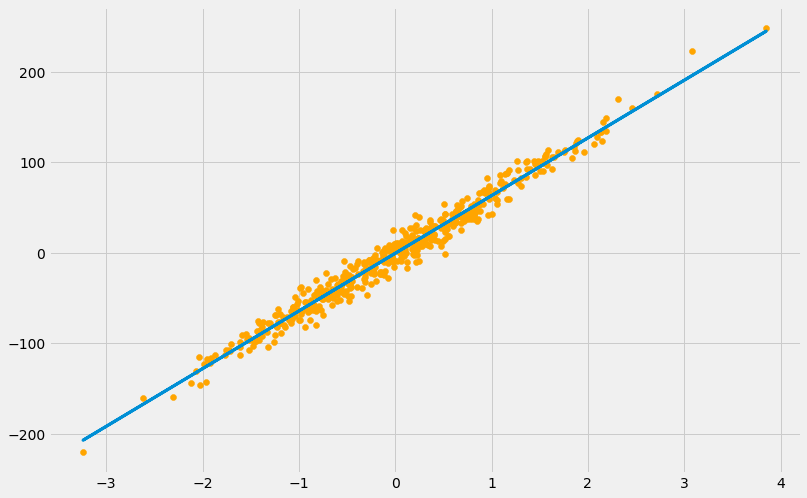

In [54]:
if X.shape == y.shape:
    plt.scatter(X, y, color='orange')
    plt.plot(X, my_linear_reg.predict(X.reshape(-1, 1)), linewidth=3);

# Animate

In [61]:
from matplotlib import rc
from IPython.display import HTML, display
rc('animation', html='jshtml')

In [62]:
my_linear_reg = MyLinearReg()

if X.shape == y.shape:
    fig = plt.figure()
    plt.scatter(X, y, color='orange')
    line, = plt.plot(X, my_linear_reg.predict(X), linewidth=3)
    plt.close()

    def animate(i):
        my_linear_reg.update_params(X_train, y_train,
                                    learning_rate=0.05)
        y_pred = my_linear_reg.predict(X)
        line.set_ydata(y_pred)
        return line,

    frames_to_display = 50
    print("[INFO] Preparing animation ...")
    training_animation = FuncAnimation(fig,
                                       animate,
                                       frames=np.arange(frames_to_display),
                                       interval=frames_to_display
                                      )
    display(training_animation)

[INFO] Preparing animation ...
